# Multiple Linear Regression

In [68]:
import pandas as pd
dataset = pd.read_csv("50_Startups.csv") # import csv using pandas

In [69]:
dataset = pd.get_dummies(dataset,drop_first=True) #convert nominal data to numerical and drop 1st column

In [70]:
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
dependent =dataset[['Profit']] #declare input and output variables

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(independent,dependent,test_size=0.30, random_state=0) #spilt training and test data

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # import LR model

In [73]:
regressor.fit(x_train,y_train) #run the LR model on the training data set

LinearRegression()

In [74]:
weight =regressor.coef_
weight #calculate weight

array([[7.90840255e-01, 3.01968165e-02, 3.10148566e-02, 4.63028992e+02,
        3.04799573e+02]])

In [75]:
bias=regressor.intercept_
bias #calculate bias

array([42403.87087053])

In [76]:
y_predict = regressor.predict(x_test)#run the Lr model to predict the training test data

In [77]:
from sklearn.metrics import r2_score
r_score =r2_score(y_test,y_predict) # import the evaluation metrics and compare the scores of output training data and test data 

In [78]:
r_score # calculate the score - close to 1 - good model

0.9358680970046241

In [79]:
import pickle
filename="final_model_MLR.sav"
pickle.dump(regressor,open(filename,"wb")) #import pickcle and save the model

In [80]:
load_model =pickle.load(open(filename,"rb")) # load the model
result = load_model.predict([[123,456,678,789,357]]) #get inputs

In [81]:
result # display the prediction for the given inputs and go for call to action

array([[516679.26408049]])

# SVR Assignment

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test) # standardize the input data

In [83]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(x_train,y_train)#import SVR and apply the model on the training data

C:\Users\TG174VB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [84]:
regressor.intercept_

array([108734.04106363])

In [85]:
regressor.n_support_

array([34])

In [86]:
regressor.support_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [87]:
y_predict=regressor.predict(x_test)#apply the model to predict the input test data

In [88]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_predict)
r_score #evaluate the outputs of test data and predicted data- not close to 1 so not saving the data

-0.057418393916219834

# Decision Tree Assignment


In [89]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

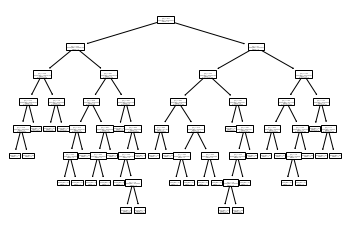

In [90]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [91]:
y_predict=regressor.predict(x_test)#apply the model to predict the input test data

In [92]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_predict)
r_score #evaluate the outputs of test data and predicted data- not close to 1 so not saving the data

0.9239755289729688

# Random Forest Assignment


In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

<ipython-input-93-022c336888b3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor()

In [94]:
y_predict=regressor.predict(x_test)

In [95]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_predict)
r_score #evaluate the outputs of test data and predicted data- not close to 1 so not saving the data

0.9325887743777077

In [96]:
import pickle
filename = "final_model_RFregressor.sav"
pickle.dump(regressor,open(filename,"wb"))

In [97]:
load_model=pickle.load(open(filename,"rb"))

In [98]:
result = load_model.predict([[1,2,3,4,5]])

In [99]:
result

array([163023.8881])